Griffin Shelor\
29-2-2024

# Homework 3: Strings and Plotting

In [1]:
## importing packages
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import string

### Q1. Write a function to play rock, paper, scissors.

An example algorithm could be as follows:
* Ask the player to `input()` 'rock', 'paper', or 'scissors'
* Use the string function `lower()` to correct the entry if the user enters a capital letter (e.g. Rock or ROCK)
* Use `choice()` from the module `random` to randomly choose 'rock', 'paper', or 'scissors'
* Print out both the user and computer choices, and let player know whether they won, lost, or tied
* Print out an error if player does not enter 'rock', 'paper', or 'scissors'

Note that your function does not need an input or an output variable. The `print()` statements may be performed inside the fucntion.

In [2]:
## asking for initial choice
initial = input("Please choose 'rock', 'paper', or 'scissors':")
## putting it in lowercase
rps_user = initial.lower()
## generating random computer choice
rps_random = random.choice(['rock', 'paper', 'scissors'])
## invalid answer
if rps_user != 'rock' and rps_user != 'paper' and rps_user != 'scissors':
    print("You did not enter a valid option, please try again")
## tie
elif rps_user == rps_random:
    print("Computer:", rps_random)
    print("You tied.")
## if user and computer choices are different
elif rps_user == 'rock' and rps_random == 'paper':
    print("Computer:", rps_random)
    print("Sorry, Computer chose paper. You lose.")
elif rps_user == 'paper' and rps_random == 'rock':
    print("Computer:", rps_random)
    print("Computer chose rock, you win!")
elif rps_user == 'rock' and rps_random == 'scissors':
    print("Computer:", rps_random)
    print("Computer chose scissors, you win!")
elif rps_user == 'scissors' and rps_random == 'rock':
    print("Computer:", rps_random)
    print("Sorry, Computer chose rock. You lose.")
elif rps_user == 'paper' and rps_random == 'scissors':
    print("Computer:", rps_random)
    print("Sorry, Computer chose scissors. You lose.")
else:
    print("Computer:", rps_random)
    print("Chomputer chose paper, you win!")

Computer: rock
Computer chose rock, you win!


### Q2. Write a function called `cypher` that makes a _Caesar cypher_, which is a type of substitution cipher in which each letter in a string of text is replaced by a different letter positioned some fixed number of characters down the alphabet. For example, with a shift of -3, E would be replaced by B, D would become A, C would be replaced by Z, and so on. The method is named after Julius Caesar, who supposedly used it in his private correspondence. The result should be in all uppercase. 
* The function `cypher` should have two inputs: a word (a string), and a shift value (an int)
* While the word may be a mix of upper and lowercase, for simplicity you should convert the output to all uppercase.
* A positive shift will shift letters to the right in the alphabet
* A negative shift will shift letters to the left in the alphabet
* The function should return the shifted new word, in all capital letters.
* For simplicity, you may assume that the input string only contains uppercase and lowercase letters (i.e. no numbers or punctuation), and that the shift is between -25 and +25.

**Examples:**
* `cypher('abc',-1)` should return 'ZAB'
* `cypher('xyz',3)` should return 'ABC'
* `cypher('Daniel',-5)` should return 'YVIDZG'

**Please do not use the following functions in your solution (and don't worry if you've never heard of them!):** 
* `chr()`, `ord()`, `char()`

In [3]:
def cypher(word, shift_val):
    ## setting list of alphabetical characters
    alphabet = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
    ## making word upper case
    word_upper = word.upper()
    ## checking length of shift_val
    if abs(shift_val) > 25:
        print("Error, shift value was more than 25 characters")
    else:
        ## if shift_val is within acceptable limits, converting string to list
        word_list = list(word_upper)
    ## checking each letter to see if it would need to wrap around to the beginning or end of the alphabet depending on direction of adjustment, then applying appropriate adjustment
    for letter in range(len(word_list)):
        if alphabet.index(word_list[letter]) + shift_val > 25:
            word_list[letter] = alphabet[abs(26 - (shift_val + alphabet.index(word_list[letter])))]
        else:
            word_list[letter] = alphabet[alphabet.index(word_list[letter]) + shift_val]
        output_word = "".join(word_list)
    return output_word
print(cypher("abc", -1))
print(cypher("zafc", -6))
print(cypher("xyz", 3))
print(cypher('whzrue', 6))
print(cypher('Daniel', -5))

ZAB
TUZW
ABC
CNFXAK
YVIDZG


### Q3. Write a function that has an integer `n` as its input parameter, where `n` can be between 1 and 9, and prints a "text triangle" with `n` lines that uses the numbers from 1 to 9. For example, if `n = 3`, the 3 printed lines would be: 

1\
22\
333 

### Print out an error if `n` is less than 1 or greater than 9.

In [4]:
def test_triangle_func(n):
    ## ensuring n is an acceptable integer
    if n < 1 or n > 9 or type(n) != int:
        print("Error, please enter an integer between 1 and 9")
    ## printing lines of 
    else:
        for num in range(1,n + 1):
            if num == n:
                print(str(num) * n)
            else:
                print(str(num) * num)
print(test_triangle_func(8))
print(test_triangle_func(6))
print(test_triangle_func(10))

1
22
333
4444
55555
666666
7777777
88888888
None
1
22
333
4444
55555
666666
None
Error, please enter an integer between 1 and 9
None


### Q4. Write a function that takes a string as its input parameter and tells the user if that string would make a strong password. You get a maximum of one point for each of the following:

* Having at least one digit
* Having at least one lowercase letter
* Having at least one uppercase letter
* Having at least one character that is in `string.punctuation`
* Having at least 12 characters

**Once you have tallied the points, score the password as follows:**
- 0-2 points: print 'that is a weak password'
- 3-4 points: print 'that is an decent password'
- 5 points: print 'that is a strong password!'

The scoring can be printed inside the function and does not need to be returned as a number.

In [5]:
def password_test(password):
    ## setting initial points total for password and acceptable numbers and letters
    score = 0
    digits = ['0','1','2','3','4','5','6','7','8','9']
    alphabet = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
    alphabet_lower = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]
    ## checking password to see if it has a number, uppercase letter, lowercase letter, or a punctuation character, then moving on to the next test once a relevant character is found
    for a in password:
        if a in digits:
            score += 1
            break
    for a in password:
        if a in alphabet:
            score += 1
            break
    for a in password:
        if a in alphabet_lower:
            score += 1
            break
    for a in password:
        if a in string.punctuation:
            score += 1
            break
    if len(password) >= 12:
        score += 1
    ## evaluating password quality
    if score == 5:
        print(score, "that is a strong password!")
    elif score > 3:
        print(score, "that is a decent password!")
    else:
        print(score, "that is a weak password!")

print(password_test("whgh"))
print(password_test("dSSGGsbbwbwodisn!64534@"))
print(password_test("fG$1"))

1 that is a weak password!
None
5 that is a strong password!
None
4 that is a decent password!
None


### Q5. Think of a creative way to use both the `random` and `math` libraries to make some interesting lists. (Alternatively, you may use `numpy` arrays if you are comfortable with that). Then use these lists/arrays to make a beautiful plot with `matplotlib` (get creative and don't just plot a solid line). Make sure the axes are labeled and there is a legend. Display the figure and save it as a png file.

* **Note**: be sure your saved version is the same as the one seen in the notebook! A common mistake is to call `plt.show()` before saving, this will clear the figure such that your saved version is blank.

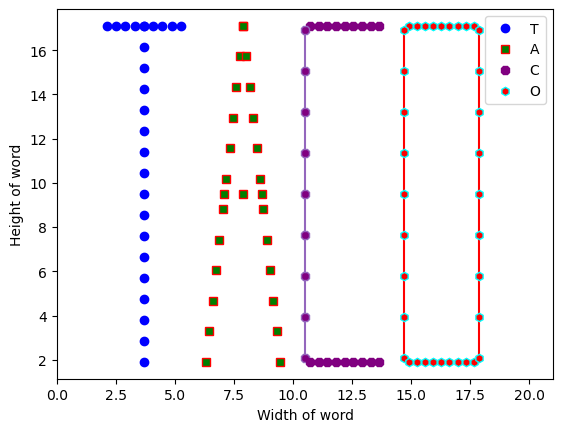

In [6]:
## setting seed
random.seed(802)
max_y = random.randint(15,20)
max_x = random.randint(20,25)
## drawing "TACO" with numpy arrays
y1 = np.linspace(0.9 * max_y, 0.9 * max_y, random.randint(5,10))
x1 = np.linspace(0.1 * max_x, 0.25 * max_x, len(y1))
y2 = np.linspace(0.9 * max_y, 0.1 * max_y, random.randint(15,20))
x2 = np.linspace(0.175 * max_x, 0.175 * max_x, len(y2))
y3 = np.linspace(0.1 * max_y, 0.9 * max_y, random.randint(10,15))
x3 = np.linspace(0.3 * max_x, 0.375 * max_x, len(y3))
y4 = np.linspace(0.9 * max_y, 0.1 * max_y, random.randint(10,15))
x4 = np.linspace(0.375 * max_x, 0.45 * max_x, len(y4))
y5 = np.linspace(np.median(y4), np.median(y4), random.randint(2,5))
x5 = np.linspace(np.median(x3), np.median(x4), len(y5))
## plot x6 with y1
x6 = np.linspace(0.51 * max_x, 0.65 * max_x, len(y1))
y7 = np.linspace(0.11 * max_y, 0.89 * max_y, len(y1))
x7 = np.linspace(0.5 * max_x, 0.5 * max_x, len(y7))
y8 = np.linspace(0.1 * max_y, 0.1 * max_y, len(y1))
## plot x8 with y1
## plot x8 with y8 as well
x8 = np.linspace(0.71 * max_x, 0.84 * max_x, len(y1))
## plot x9 with y7
x9 = np.linspace(0.7 * max_x, 0.7 * max_x, len(y7))
## plot x11 with y7
x10 = np.linspace(0.85 * max_x, 0.85 * max_x, len(y7))



plt.plot(x1, y1, 'o', color = 'blue', label = 'T')
plt.plot(x2, y2, 'o', color = 'blue')
plt.plot(x3, y3, 's', mfc = 'green', mec = 'red', label = 'A')
plt.plot(x4, y4, 's', mfc = 'green', mec = 'red')
plt.plot(x5, y5, 's', mfc = 'green', mec = 'red')
plt.plot(x6, y1, '8', mfc = 'purple', mec = 'purple', label = 'C')
plt.plot(x7, y7, marker = '8', mfc = 'purple')
plt.plot(x6, y8, '8', mfc = 'purple', mec = 'purple')
plt.plot(x8, y1, 'h', mfc = 'red', mec = 'cyan', label = 'O')
plt.plot(x9, y7, marker = 'h', color = 'red', mec = 'cyan')
plt.plot(x8, y8, 'h', mfc = 'red', mec = 'cyan')
plt.plot(x10, y7, marker = 'h', color = 'red', mec = 'cyan')
## setting x axis width
plt.xlim([0, max_x])
## adding labels and legend
plt.xlabel('Width of word')
plt.ylabel('Height of word')
plt.legend(loc = 'best');

plt.savefig('Homework3.png',dpi=300)

### Please list any other students that you worked with on this assignment

In [7]:
# I worked with the following students: Hannah Potts, Faith Machuca

### To receive credit for this homework upload both the .ipynb file and an .html version.